In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('framingham.csv')

In [3]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isnull().sum()
# the total number of missing values contribute only 12% of the entire data and thus the rows with missing values can be dropped.

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
data=df.dropna()

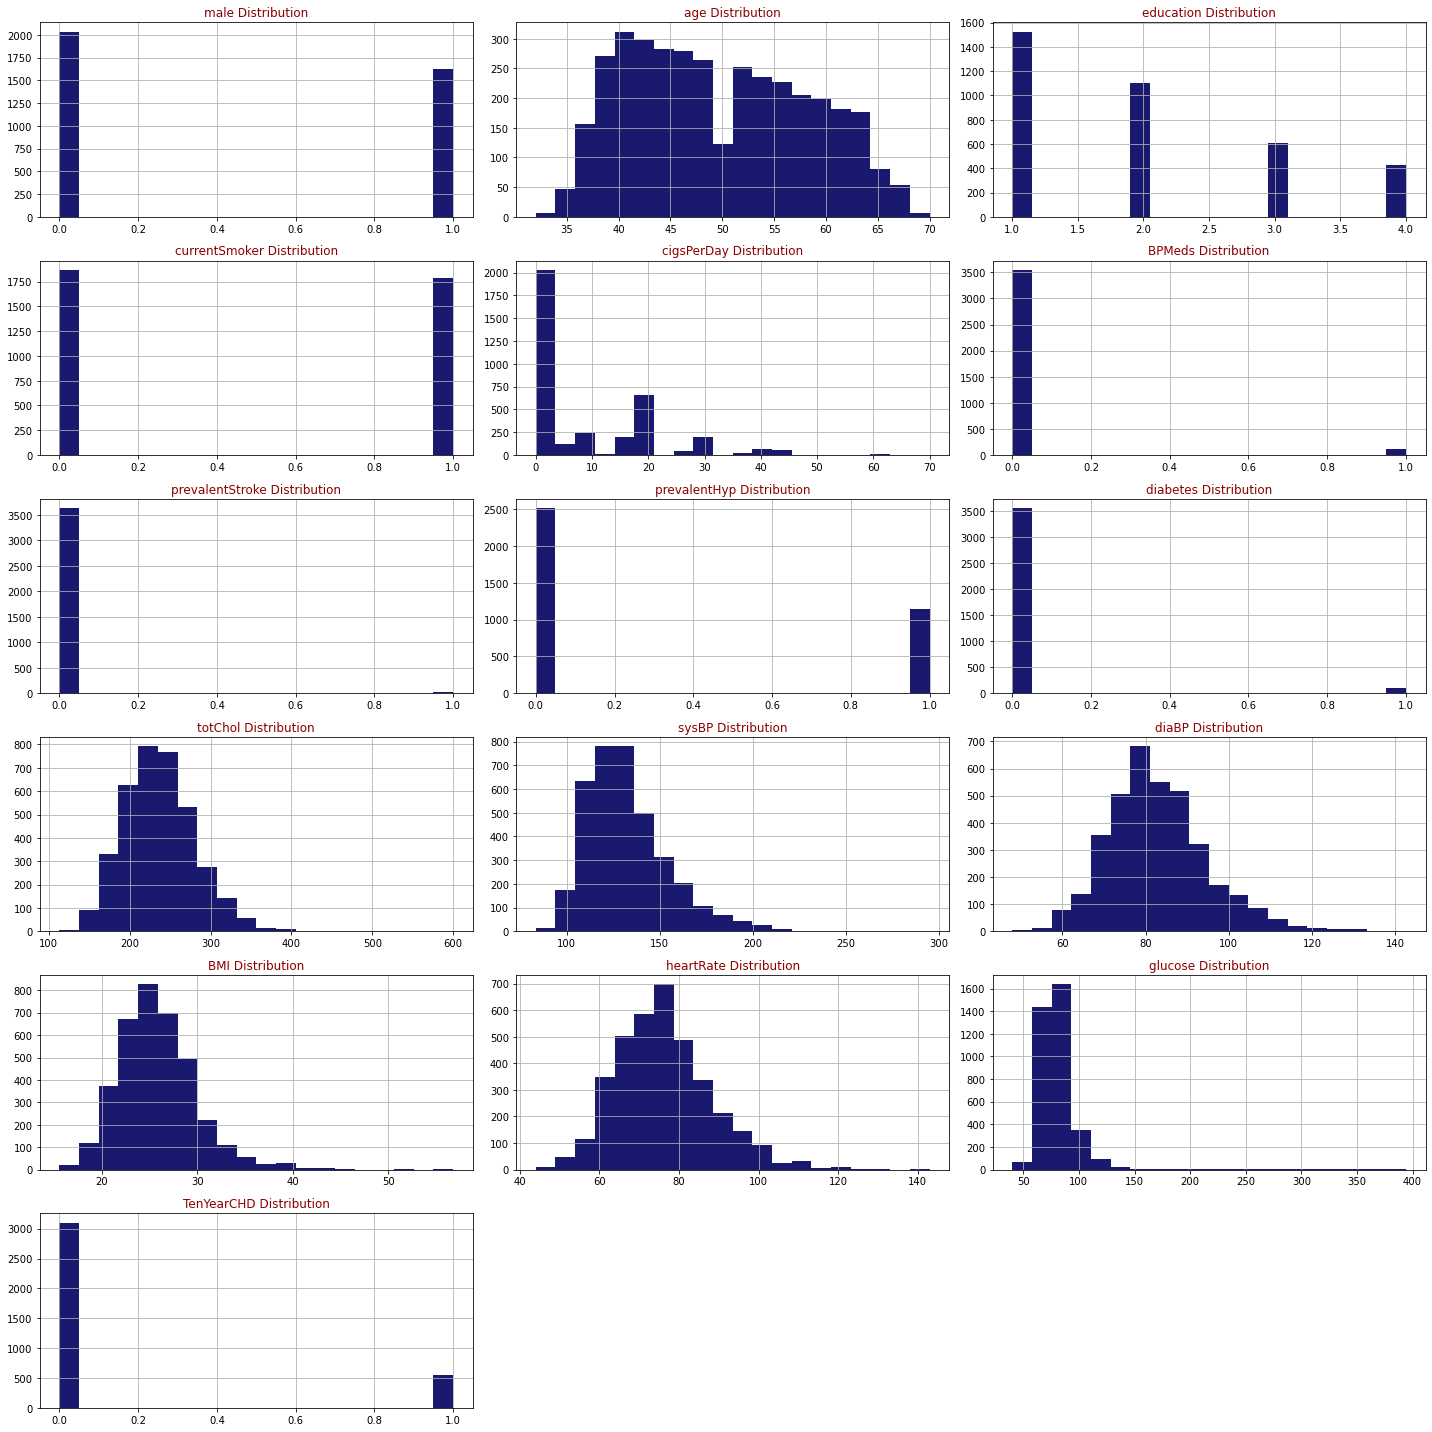

In [7]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [4]:
df.TenYearCHD.value_counts()
# This dataset is dominated by the patients who have low risk of the CHD.

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [7]:
#1.Age attribute has values of age of the patients when the data was collected. It ranges from 32-70 years.
df['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69], dtype=int64)

In [8]:
# Forming age groups
df['ageGroup'] = pd.cut(x=df['age'], bins=[30, 39, 49, 59, 70],labels=['30-39', '40-49', '50-59', '60-70'])

In [9]:
df.ageGroup.value_counts()
# Age group between 40-59 has high participation in the study

40-49    1661
50-59    1333
60-70     690
30-39     556
Name: ageGroup, dtype: int64

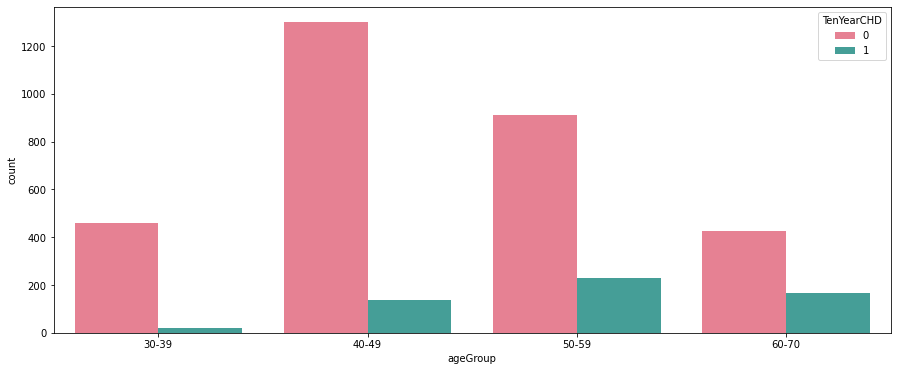

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='ageGroup',data = df, hue = 'TenYearCHD',palette='husl')
plt.show()
# From the below plot it is observed that age group 50-70 has the high risk of heart attack

In [13]:
#2. Which gender is more prone to CHD
df.male.value_counts()
#The female count is greater than the male count in the dataset

0    2035
1    1623
Name: male, dtype: int64

C:\Users\Cathy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


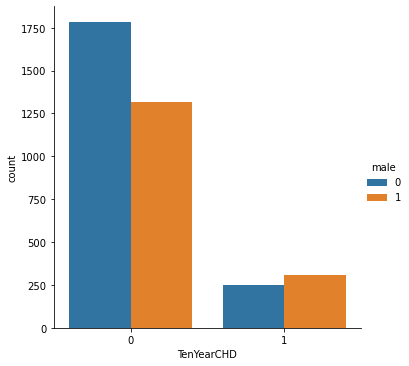

In [14]:
sns.catplot('TenYearCHD',data=df,hue='male',kind='count')
#Though female count is more, males are more prone to the disease as seen below

In [15]:
#3. Number of people who had diabetes in the dataset is very low which is 99.
df.diabetes.value_counts()

0    3559
1      99
Name: diabetes, dtype: int64

C:\Users\Cathy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


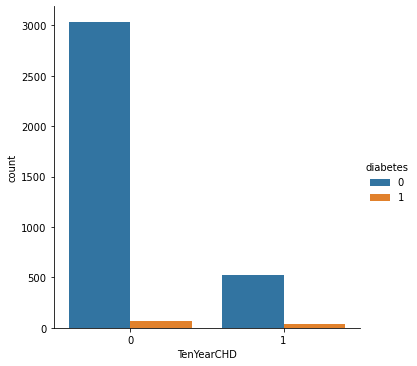

In [16]:
sns.catplot('TenYearCHD',data=df,hue='diabetes',kind='count')
#Though the count of people having diabetes is very low in dataset, the percentage of high risk of CHD is high for those who already have diabetes than those who is non diabetic.

In [17]:
#4. How smoking is related to CHD in this dataset is below:
df['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15., 10.,  5., 35., 43.,  1., 40.,  3.,  9.,
        2., 12.,  4., 18., 60., 25., 45.,  8., 13., 11.,  7.,  6., 38.,
       50., 29., 17., 16., 19., 70., 14.])

In [18]:
df['cigsGroup'] = pd.cut(x=df['cigsPerDay'], bins=[0, 1, 10, 30, 70],labels=['no cigs','<10 cigs', '11<cigs<30', '>31 cigs'])

In [19]:
df.cigsGroup.value_counts()
#1108 people smoke about 11-30 cigs per day

11<cigs<30    1108
<10 cigs       465
>31 cigs       155
no cigs         61
Name: cigsGroup, dtype: int64

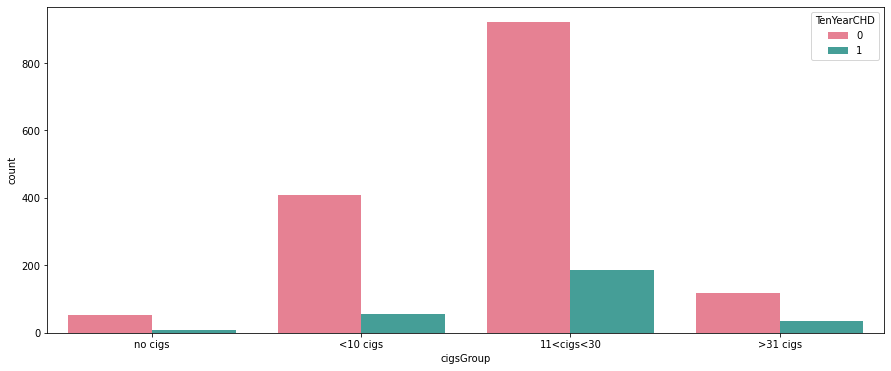

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x='cigsGroup',data = df, hue = 'TenYearCHD',palette='husl')
plt.show()
# From the below plot it is observed that those who smoke more than 10 cigarettes per day are more prone to high risk of CHD

In [5]:
data = df
data = data.drop(['education'], axis=1) 
#data = data.drop(['currentSmoker'], axis=1) 

In [6]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

<ipython-input-6-6800256adf4b>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + '%' for y in y_labels])


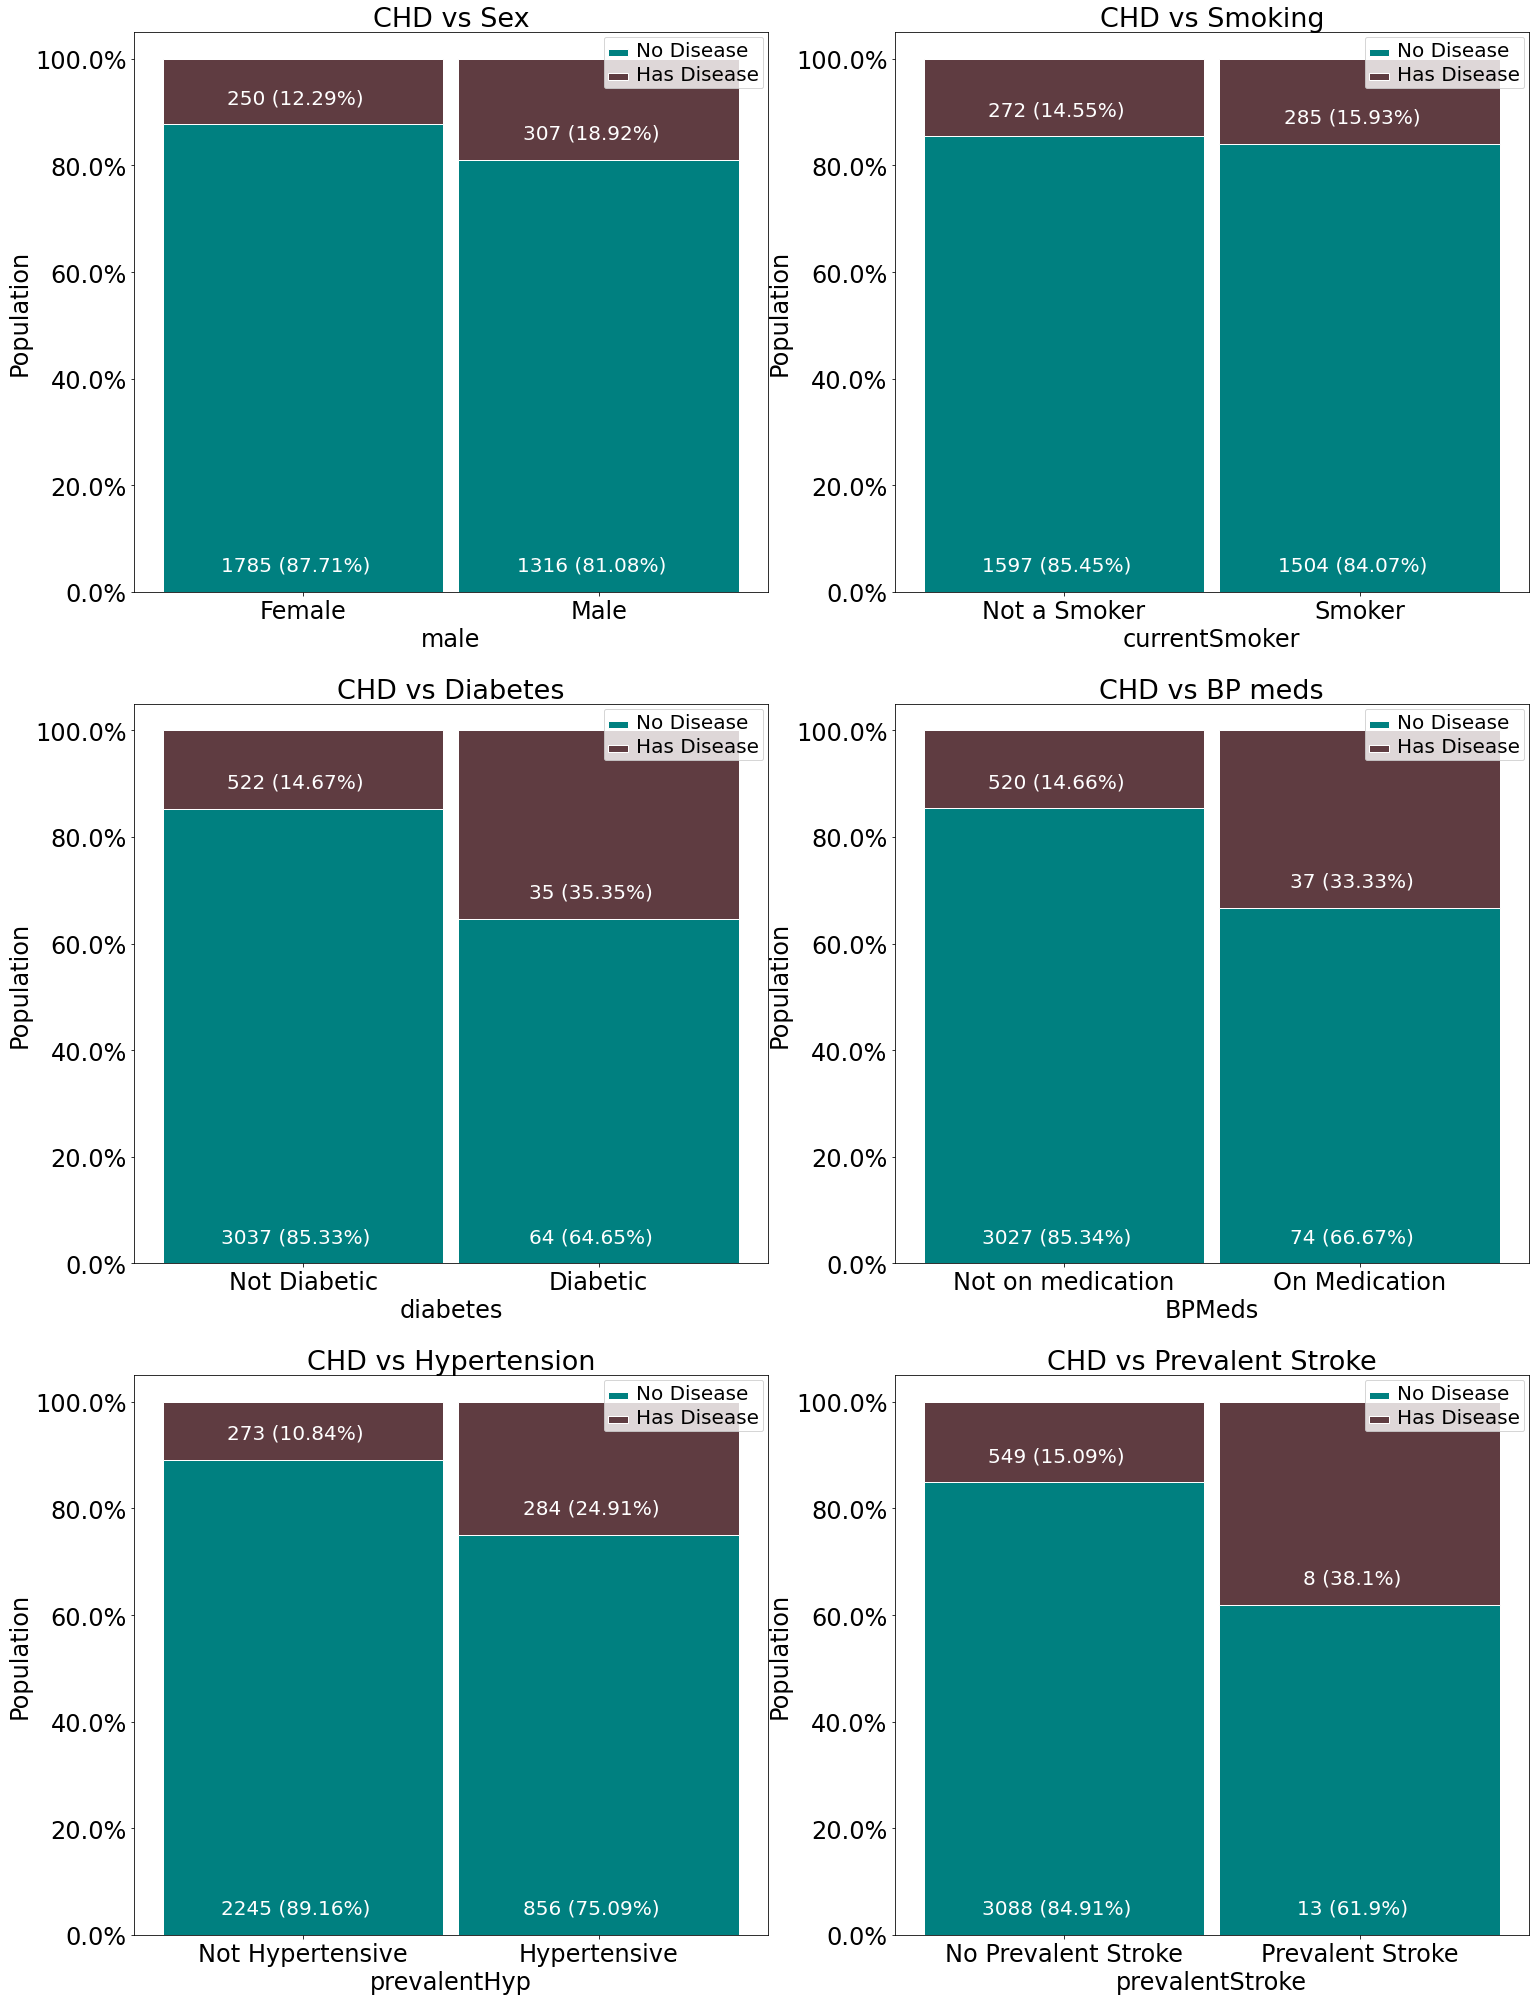

In [7]:
from operator import add
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population')

#draw smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['currentSmoker','TenYearCHD']].groupby(['currentSmoker','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylabel = 'Population')

#draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylabel = 'Population')

#draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BP meds', ylabel = 'Population')

#draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylabel = 'Population')

#draw PrevalentStroke vs disease outcome
plt.subplot(grid_rows, grid_cols, 6)
temp = data[['prevalentStroke','TenYearCHD']].groupby(['prevalentStroke','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'No Prevalent Stroke', 1:'Prevalent Stroke'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Prevalent Stroke', ylabel = 'Population')

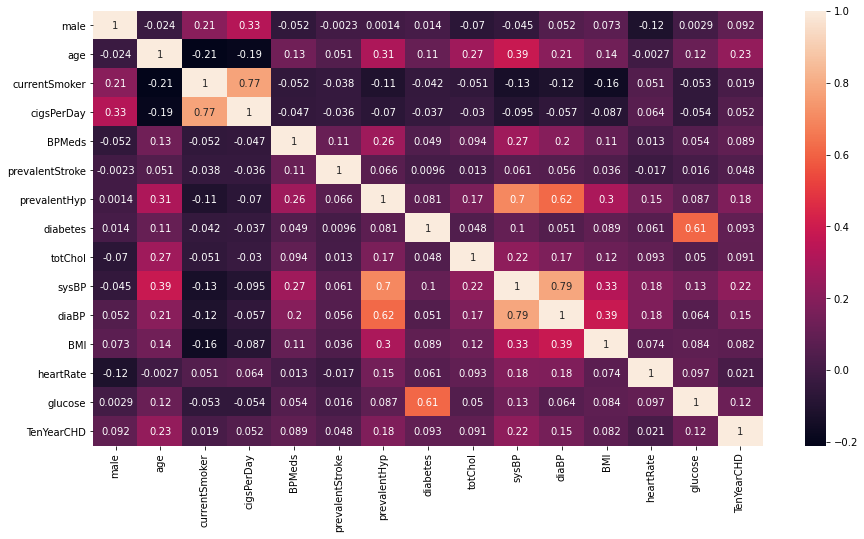

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [6]:
data = data.drop(['currentSmoker'], axis=1)

In [10]:
# separate independent & dependent variables
x = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column

In [11]:
import statsmodels.api as sm
res = sm.Logit(y,x).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.400384
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3738
Method:                           MLE   Df Model:                           12
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:                 0.06235
Time:                        12:18:24   Log-Likelihood:                -1501.8
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.696e-36
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4106      0.103      3.999      0.000       0.209       0.612
age                 0.0287      0.006      4.999      0.000       0.017       0.040
cigsPerDay          0.0143      0.004      3.499      0.000       0.006       0.022
BPMeds              0.3278      0.227      1.442      0.149      -0.118       0.773
prevalentStroke     0.7906      0.483      1.636      0.102      -0.157       1.738
prevalentHyp        0.9883      0.122      8.126      0.000       0.750       1.227
diabetes            0.7992      0.291      2.749      0.006       0.229       1.369
totChol            -0.0015      0.001     -1.429      0.153      -0.004       0.001
sysBP               0.0132      0.004      3.516      0.000       0.006       0.021
diaBP              -0.0304      0.006     -5.072      0.000      -0.042      -0.019
BMI                -0.0452      0.012     -3.704      0.000      -0.069      -0.021
heartRate          -0.0234      0.004     -5.981      0.000      -0.031      -0.016
glucose             0.0018      0.002      0.859      0.390      -0.002       0.006
===================================================================================
"""

In [12]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                       5%       95%  Odds Ratio
male             1.232870  1.843790    1.507698
age              1.017579  1.040713    1.029081
cigsPerDay       1.006290  1.022494    1.014359
BPMeds           0.889034  2.166940    1.387978
prevalentStroke  0.854927  5.685775    2.204749
prevalentHyp     2.116896  3.409970    2.686736
diabetes         1.257963  3.931043    2.223760
totChol          0.996376  1.000570    0.998470
sysBP            1.005859  1.020773    1.013289
diaBP            0.958753  0.981532    0.970076
BMI              0.933284  0.978968    0.955853
heartRate        0.969425  0.984398    0.976883
glucose          0.997730  1.005833    1.001774


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs       Score
8          sysBP  667.109932
12       glucose  402.409837
1            age  297.974980
7        totChol  252.958627
2     cigsPerDay  185.115196
9          diaBP  142.920436
5   prevalentHyp   82.342164
6       diabetes   31.711253
3         BPMeds   26.116583
0           male   19.178560


In [15]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
8,sysBP,667.109932
12,glucose,402.409837
1,age,297.974980
7,totChol,252.958627
2,cigsPerDay,185.115196
9,diaBP,142.920436
5,prevalentHyp,82.342164
6,diabetes,31.711253
3,BPMeds,26.116583
0,male,19.178560


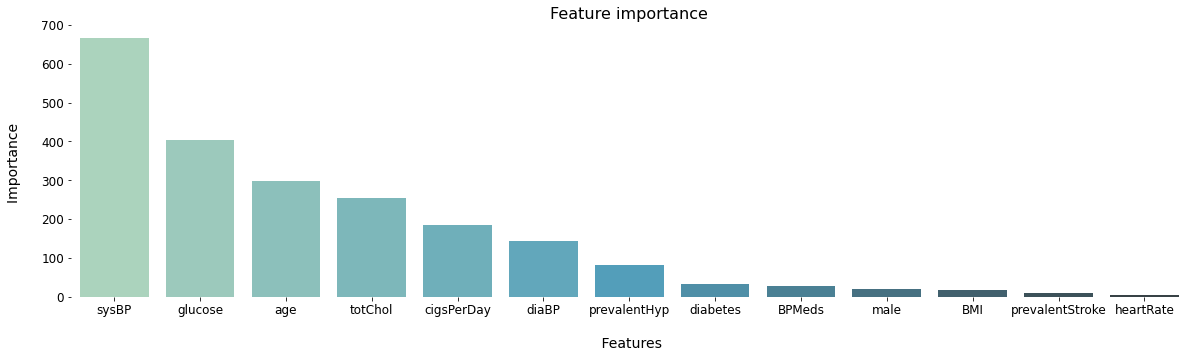

In [16]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
from sklearn.decomposition import PCA
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [23]:
explained_variance

array([0.23960548, 0.12145045, 0.10383483, 0.08550874, 0.07829333,
       0.07672525, 0.06798713, 0.06011201, 0.05242648, 0.04339116,
       0.03008769, 0.02785571, 0.01272173])

In [40]:
'''model = PCA(n_components=10).fit(X_train)
X_pc = model.transform(X_train)
n_pcs= model.components_.shape[0]
n_pcs
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['male','age','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol',
                        'sysBP','disBP','BMI','heartRate','glucose']
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
df

# EDA

In [4]:
data = data.drop(['education'], axis=1) 
data = data.drop(['currentSmoker'], axis=1) 

The correlation coefficients of the variables individually did not shown a strong correlation with TenYearCHD. This only confirms what was already expected: the propensity of developing heart disease is a result of a conjunction of factors

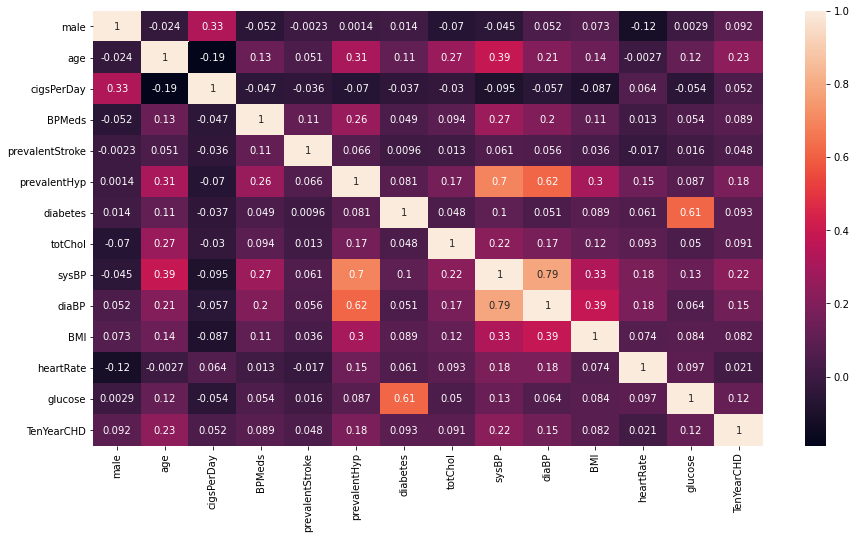

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [12]:
# Forming age groups
data['ageGroup'] = pd.cut(x=df['age'], bins=[30, 39, 49, 59, 70],labels=['30-39', '40-49', '50-59', '60-70'])

<AxesSubplot:title={'center':'HEXBIN CHART'}, xlabel='sysBP', ylabel='TenYearCHD'>

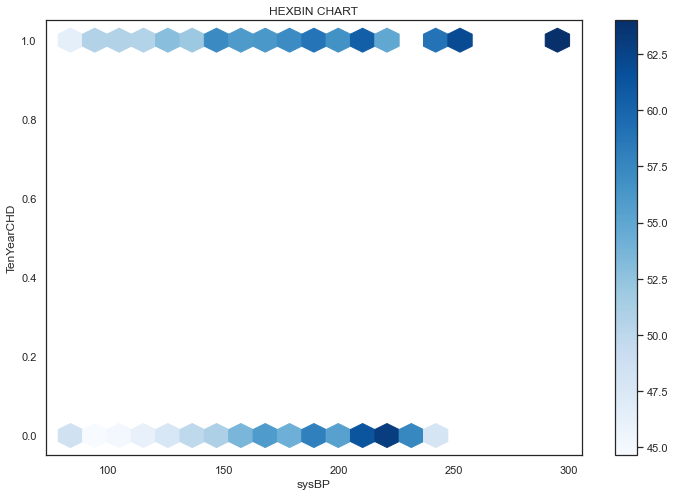

In [89]:
data.plot(
    kind='hexbin',
    x='sysBP',
    y='TenYearCHD',
    C='age',
    title ='HEXBIN CHART',
    gridsize=20,
    figsize=(12,8),
    cmap="Blues", # defaults to greenish
    sharex=False 
)

In [29]:
data = data.rename(columns = {'male': 'sex'}, inplace = False)

<AxesSubplot:title={'center':'STACKED AREA CHART'}, xlabel='age'>

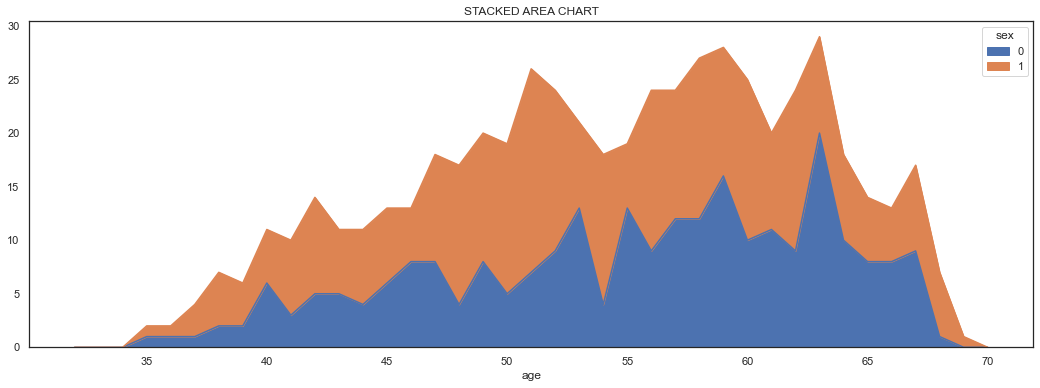

In [96]:
data.groupby(
    ['age','sex']
)['TenYearCHD'].sum().unstack().plot(
    kind='area',
    title = 'STACKED AREA CHART'
    #figsize=(12,8),
    #cmap="Blues", # defaults to orangish
)

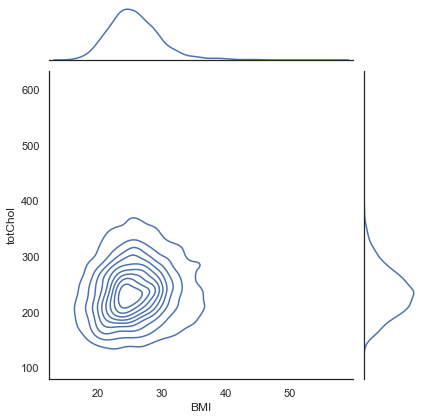

In [75]:
sns.jointplot(
    x='BMI',
    y='totChol',
    data=data,
    kind='kde' # or 'kde' or 'hex'
)

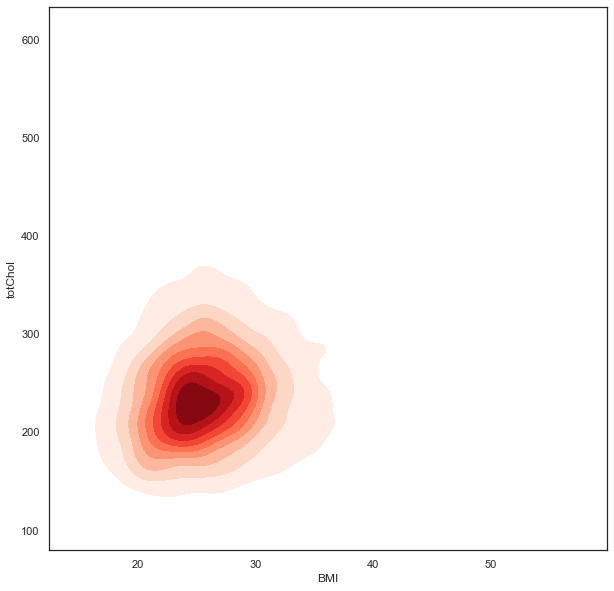

In [86]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.kdeplot(data.BMI, data.totChol,cmap="Reds", shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
#ax.text(3.8, 4.5, "Score", size=16, color="b")
plt.show()

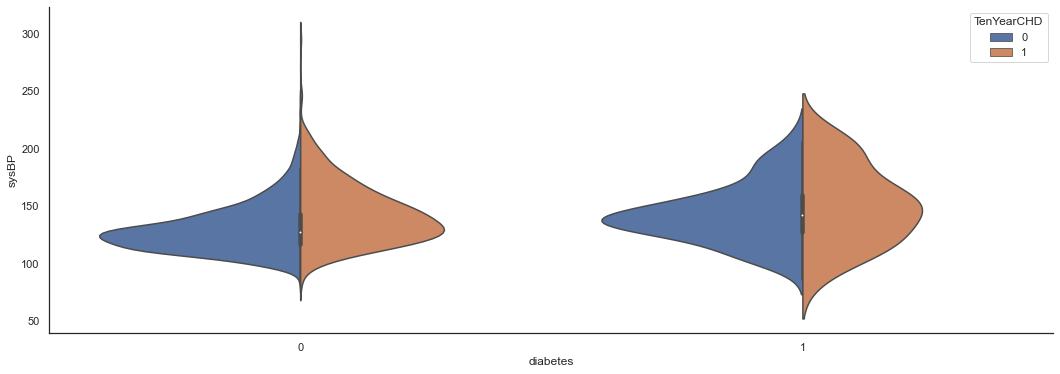

In [100]:
sns.set(
    rc={'figure.figsize':(18,6)}, 
    style="white"
)
sns.violinplot(
    x='diabetes',
    y='sysBP',
    hue='TenYearCHD',
    data=data,
    split=True
)
sns.despine()

In [63]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

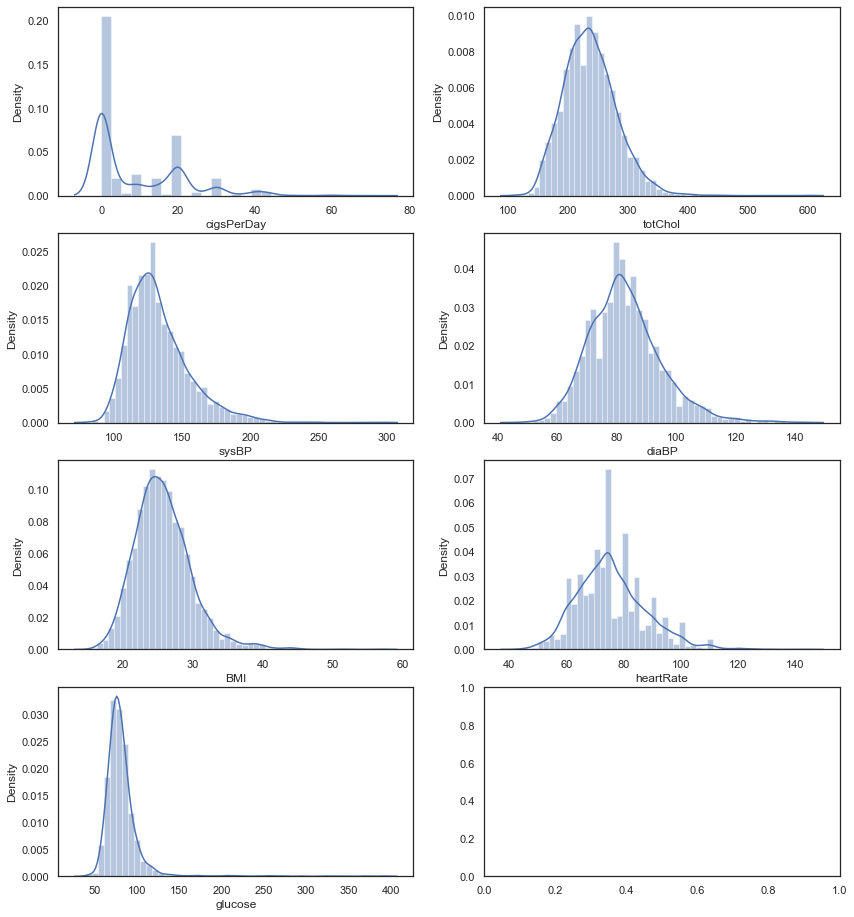

In [68]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in numeric_features:
    sns.distplot(data[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

cigsperday demonstrated to be a highly unevenly distributed variable
heartRate is also unevenly distributed
glucose, BMI, diaBP, sysBP and totChol variables demonstrated to be more evenly distributed, similar to a normal distribution.

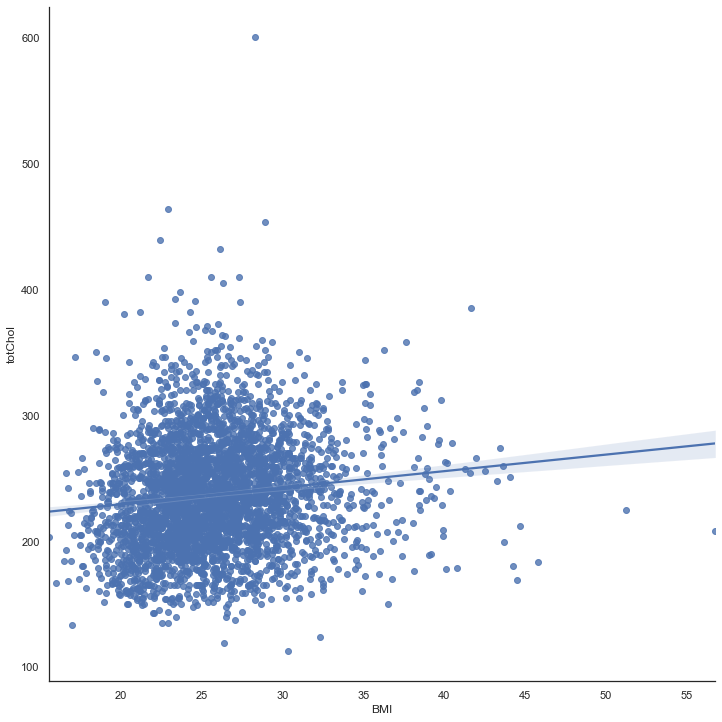

In [80]:
sns.lmplot(x="BMI", y="totChol", data=data,size=10,)
plt.show()